In [1]:
import pandas as pd
import scanpy as sc
import loompy as lp
import zlib
import json
import base64
import matplotlib.pyplot as plt


In [2]:
df_meta = pd.read_csv('../../processed_data/clean_data/metadata.csv', index_col = 0)

In [3]:
lf = lp.connect( './output/pyscenic_aucell_output.loom', mode='r', validate=False )
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

# create a dictionary of regulons:
regulons = {}
for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():
    regulons[i] =  list(r[r==1].index.values)
    
lf.close()

In [4]:
data_obj = sc.AnnData(auc_mtx.values, 
                     obs = df_meta,
                     var = pd.DataFrame([], index = auc_mtx.columns)
                     )

In [5]:
sc.pp.pca(data_obj, n_comps= 50)
sc.pp.neighbors(data_obj, n_neighbors=10)
sc.tl.umap(data_obj)

... storing 'subject_id' as categorical
... storing 'tissue' as categorical
... storing 'pid' as categorical
... storing 'celltype' as categorical
... storing 'clinical' as categorical


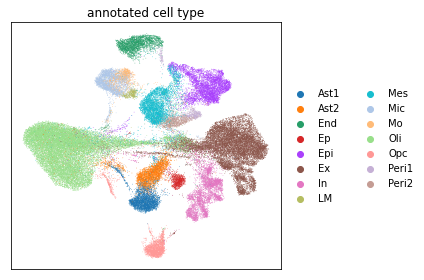

In [6]:
fig, axes = plt.subplots(1, 1, figsize = (6, 4))

ax = axes
sc.pl.umap(data_obj, color = ['celltype'], show = False, ax = ax)
plt.sca(ax)
plt.xlabel('')
plt.ylabel('')
plt.title('annotated cell type')
plt.tight_layout()
plt.savefig('../../figs/umap_scenic_celltype.pdf')
plt.savefig("../../figs/png/umap_scenic_celltype.png", dpi = 600, bbox_inches='tight')
plt.show()

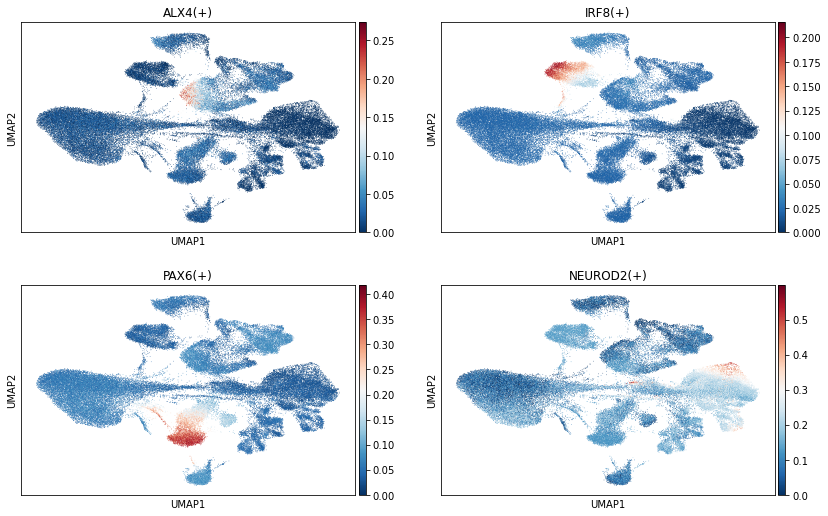

In [25]:
sc.pl.umap(data_obj, color = ['ALX4(+)', 'IRF8(+)', 'PAX6(+)', 'NEUROD2(+)'], 
           ncols=2, color_map='RdBu_r', show = False)

plt.savefig('../../figs/umap_tf_score.pdf')